In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

        


In [9]:

df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin-1')


In [10]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [11]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [12]:
df.isnull()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180515,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180516,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
180517,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [16]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [17]:
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [18]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )


C:\Users\bipla\AppData\Local\Temp\ipykernel_16968\3021138909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
#Customer Segments
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

In [20]:
data_countries=df1.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_countries.head(20), x='Number of Orders',y = 'Order Country',color ='Number of Orders')


In [21]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [22]:
#Product
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

# Forecasting¶

Predicting if an order is fraud or not



In [21]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [23]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [24]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

In [25]:
features=features.apply(Labelencoder_feature)
features.head()


,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,...,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,...,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,...,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,...,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,...,114,47,0,78,78,62,0,1528,3,10505


In [26]:
#deleting features which high-correlated with other features to avoid multicollinarity
data1=pd.concat([features,target],axis=1)


In [27]:
#deleting features which high-correlated with other features to avoid multicollinarity

corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns


Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode',
       'Product Description', 'Product Image', 'Product Status',
       'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'],
      dtype='object')

In [28]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]

In [29]:
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
    
    
corre

C:\Users\bipla\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

C:\Users\bipla\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,...,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641,0.000490
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,...,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639,0.835012


In [31]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [32]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [33]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results


,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
4,Late_delivery_risk,5188.953532,0.000
31,Order Region,14.875551,0.000
8,Customer Id,15.868141,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728124,0.009
16,Order City,6.260967,0.012
9,Customer Segment,6.358072,0.012


In [34]:
f_reg_list=f_reg_results.Variable.values
f_reg_list


array(['Type', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Order Region', 'Customer Id',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Longitude', 'Order Country', 'Latitude', 'Order Zipcode',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [35]:
#final features list is both f_ref_list and new_feature
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]


In [36]:
final_data=pd.concat([final_features, target], axis=1)

<Axes: >

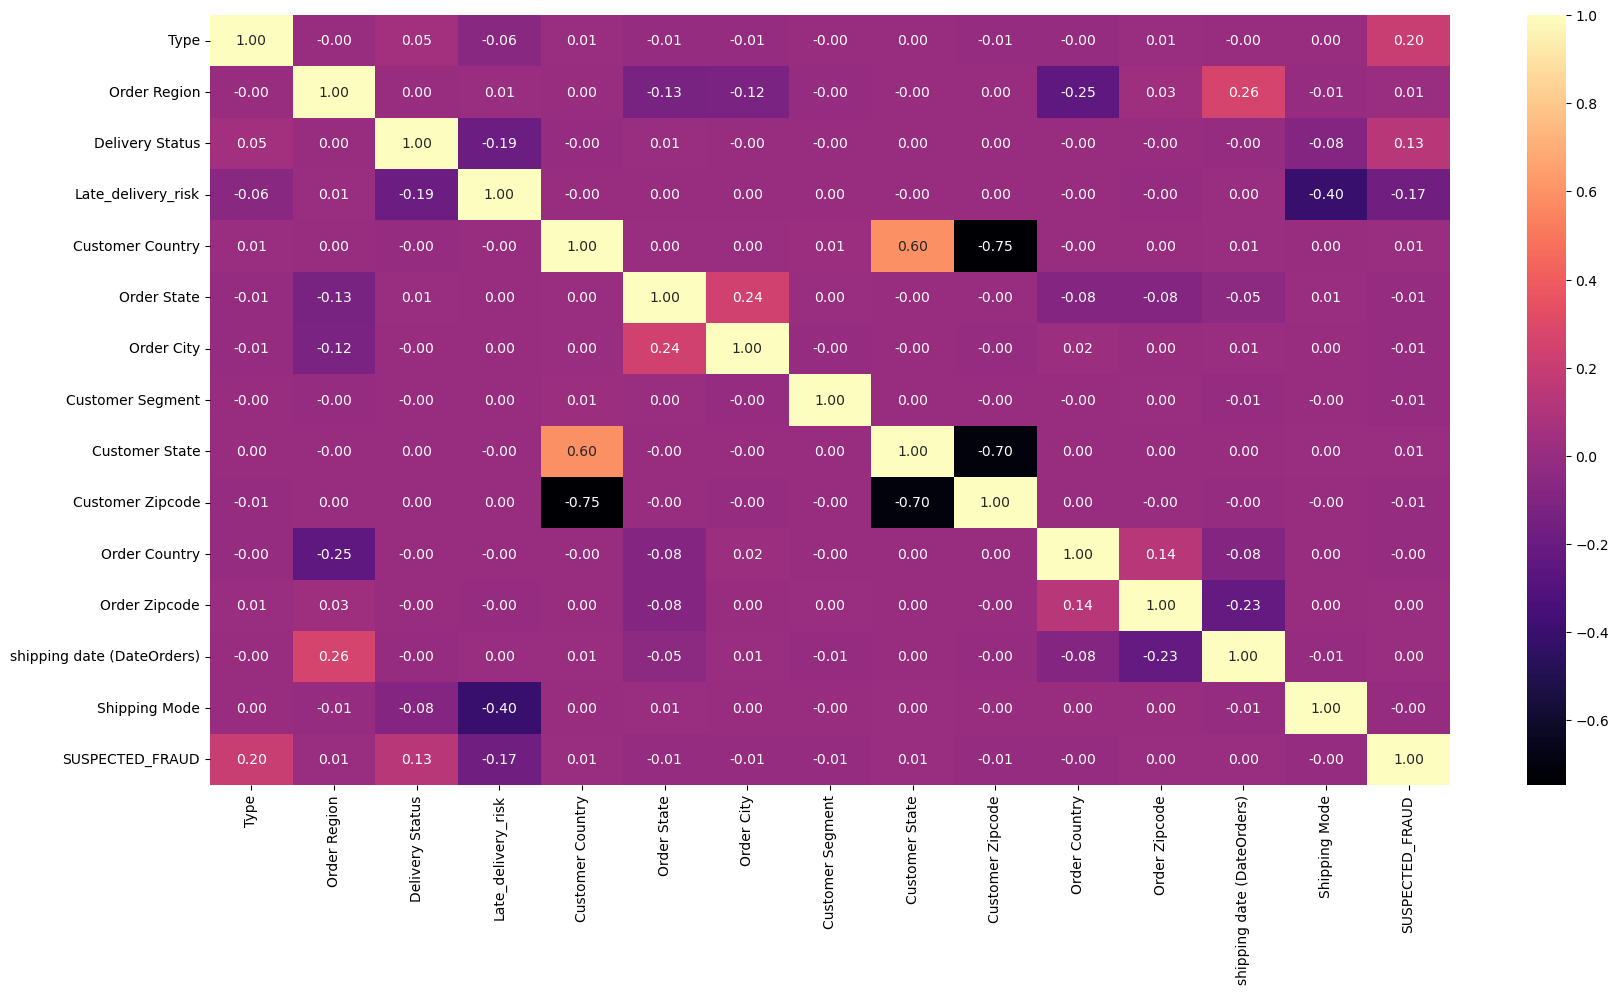

In [37]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [40]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report


ModuleNotFoundError: No module named 'xgboost'

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

In [43]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [44]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

In [45]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [46]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())


Logistic Regression :  0.9764456985828234
RandomForestClassifier :  0.9914634929717501
KNeighborsClassifier :  0.9817637011135805
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9929314740519706


In [47]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    
    
    
]

In [48]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    
    
    
]

In [49]:
best_model = random_search.fit(X_train, y_train)

NameError: name 'random_search' is not defined